## Federal University of Bahia (UFBA)

### Control Systems Projects

### Challenge 02 - Small Gain Theorem and Anti-Windup

### Professor: Tito Maia

### Student: Gabriel Correia

---


#### **OBSERVAÇÃO INICIAL**

Esse código ficou muito complicado, por isso, em cada item, eu copio basicamente tudo do anterior para mudar e simular de novo. Tinha forma mais inteligente de fazer isso aqui.


## Importanto Bibliotecas

In [27]:
!pip install control

In [28]:
# Importando as bibliotecas para trabalhar como se fosse no MATLAB

import numpy as np
import matplotlib.pyplot as plt
import control as ct

# Tenta importar a biblioteca de controle e a instala se não estiver presente
try:
    import control as ct
except ImportError:
    print("Biblioteca 'control' não encontrada. Tentando instalar...")
    import subprocess
    import sys
    try:
        subprocess.check_call([sys.executable, "-m", "pip", "install", "control"])
        import control as ct
        print("Biblioteca 'control' instalada com sucesso. Rodando o script...")
    except Exception as e:
        print(f"Falha ao instalar a biblioteca 'control'. Erro: {e}")
        print("Por favor, instale a biblioteca manualmente executando: pip install control")
        sys.exit()

## Simulação Questão 1

Parâmetros do Modelo Nominal (Médio):
Ganho Médio (Kn): 1.0500
Atraso Médio (Ln): 0.6500
Constante de Tempo Média (τn): 1.0000

Incerteza Multiplicativa Estática (em w -> 0):
Δ1 (Modelo M1): 0.2381 (ou 23.81%)
Δ2 (Modelo M2): 0.1429 (ou 14.29%)
Δ3 (Modelo M3): 0.1429 (ou 14.29%)
Δ4 (Modelo M4): 0.2381 (ou 23.81%)



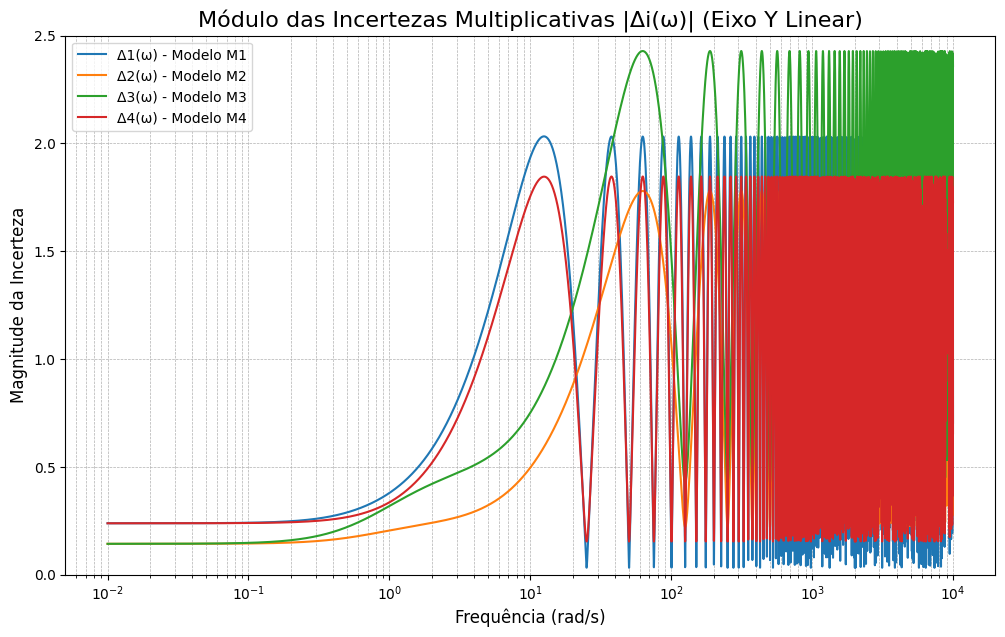

In [29]:
# --- Passo 1: Definição dos Parâmetros dos Modelos ---

# Parâmetros do Modelo 1 (M1)
K1, L1, tau1 = 1.3, 0.9, 1.2
# Parâmetros do Modelo 2 (M2)
K2, L2, tau2 = 0.9, 0.7, 1.1
# Parâmetros do Modelo 3 (M3)
K3, L3, tau3 = 1.2, 0.6, 0.8
# Parâmetros do Modelo 4 (M4)
K4, L4, tau4 = 0.8, 0.4, 0.9

# --- Passo 2: Cálculo dos Parâmetros do Modelo Nominal (Médio) ---

Kn = (K1 + K2 + K3 + K4) / 4
Ln = (L1 + L2 + L3 + L4) / 4
taun = (tau1 + tau2 + tau3 + tau4) / 4

print("Parâmetros do Modelo Nominal (Médio):")
print(f"Ganho Médio (Kn): {Kn:.4f}")
print(f"Atraso Médio (Ln): {Ln:.4f}")
print(f"Constante de Tempo Média (τn): {taun:.4f}\n")

# --- Cálculo e Apresentação da Incerteza Estática (em w -> 0) ---

Delta1_static = np.abs(1 - K1 / Kn)
Delta2_static = np.abs(1 - K2 / Kn)
Delta3_static = np.abs(1 - K3 / Kn)
Delta4_static = np.abs(1 - K4 / Kn)

print("Incerteza Multiplicativa Estática (em w -> 0):")
print(f"Δ1 (Modelo M1): {Delta1_static:.4f} (ou {Delta1_static:.2%})")
print(f"Δ2 (Modelo M2): {Delta2_static:.4f} (ou {Delta2_static:.2%})")
print(f"Δ3 (Modelo M3): {Delta3_static:.4f} (ou {Delta3_static:.2%})")
print(f"Δ4 (Modelo M4): {Delta4_static:.4f} (ou {Delta4_static:.2%})\n")


# --- Passo 3: Definição do Vetor de Frequência ---
w = np.logspace(-2, 4, 10000)
s = 1j * w

# --- Passo 4: Cálculo das Respostas em Frequência (G(jw)) ---
Gn_jw = Kn * np.exp(-s * Ln) / (taun * s + 1)
G1_jw = K1 * np.exp(-s * L1) / (tau1 * s + 1)
G2_jw = K2 * np.exp(-s * L2) / (tau2 * s + 1)
G3_jw = K3 * np.exp(-s * L3) / (tau3 * s + 1)
G4_jw = K4 * np.exp(-s * L4) / (tau4 * s + 1)

# --- Passo 5: Cálculo das Incertezas Multiplicativas ---
Delta1 = np.abs(1 - G1_jw / Gn_jw)
Delta2 = np.abs(1 - G2_jw / Gn_jw)
Delta3 = np.abs(1 - G3_jw / Gn_jw)
Delta4 = np.abs(1 - G4_jw / Gn_jw)

# --- Passo 6: Geração do Gráfico com Eixo Y Linear ---

plt.figure(figsize=(12, 7))
plt.semilogx(w, Delta1, label=f'Δ1(ω) - Modelo M1')
plt.semilogx(w, Delta2, label=f'Δ2(ω) - Modelo M2')
plt.semilogx(w, Delta3, label=f'Δ3(ω) - Modelo M3')
plt.semilogx(w, Delta4, label=f'Δ4(ω) - Modelo M4')

plt.title('Módulo das Incertezas Multiplicativas |Δi(ω)| (Eixo Y Linear)', fontsize=16)
plt.xlabel('Frequência (rad/s)', fontsize=12)
plt.ylabel('Magnitude da Incerteza', fontsize=12)
plt.grid(True, which="both", linestyle='--', linewidth=0.5)
plt.legend()
plt.ylim([0, 2.5])
plt.show()



## Simulação Questão 2

In [30]:
# --- Parâmetros do Modelo Nominal (da Questão 1) ---
Kn = 1.05
Ln = 0.65
taun = 1.0

# --- Parâmetro de Projeto (dado na Questão 2) ---
tau_c = 0.5

# --- Cálculo dos Parâmetros do Controlador (Regras de Skogestad) ---

# Cálculo do Ganho Proporcional (Kc)
Kc = taun / (Kn * (tau_c + Ln))

# Cálculo do Tempo Integral (Ti)
Ti = np.min([taun, 4 * (tau_c + Ln)])

# --- Apresentação dos Resultados ---

print("Cálculo dos Parâmetros do Controlador PI (Skogestad)")
print("-" * 50)
print(f"Parâmetros de entrada:")
print(f"  - Kn = {Kn:.4f}")
print(f"  - Ln = {Ln:.4f} s")
print(f"  - τn = {taun:.4f} s")
print(f"  - τc (desejado) = {tau_c:.4f} s\n")

print(f"Resultados:")
print(f"  - Ganho Proporcional (Kc) = {Kc:.4f}")
print(f"  - Tempo Integral (Ti) = {Ti:.4f} s\n")

print("Função de Transferência do Controlador C(s):")
print(f"  C(s) = {Kc:.4f} * (s + 1) / s")


Cálculo dos Parâmetros do Controlador PI (Skogestad)
--------------------------------------------------
Parâmetros de entrada:
  - Kn = 1.0500
  - Ln = 0.6500 s
  - τn = 1.0000 s
  - τc (desejado) = 0.5000 s

Resultados:
  - Ganho Proporcional (Kc) = 0.8282
  - Tempo Integral (Ti) = 1.0000 s

Função de Transferência do Controlador C(s):
  C(s) = 0.8282 * (s + 1) / s


## Simulação Questões 3 e 4

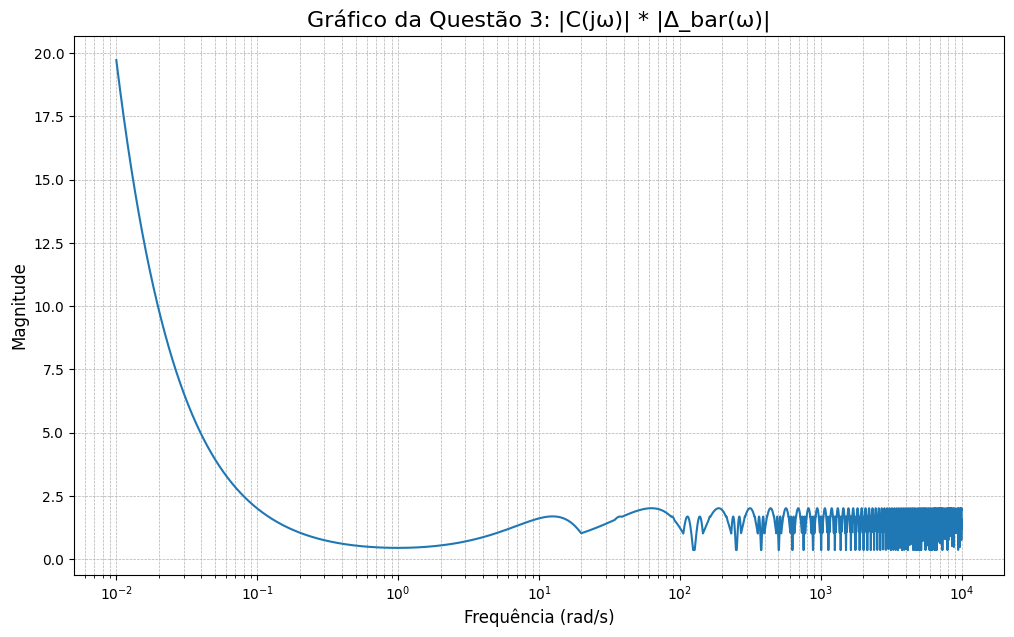

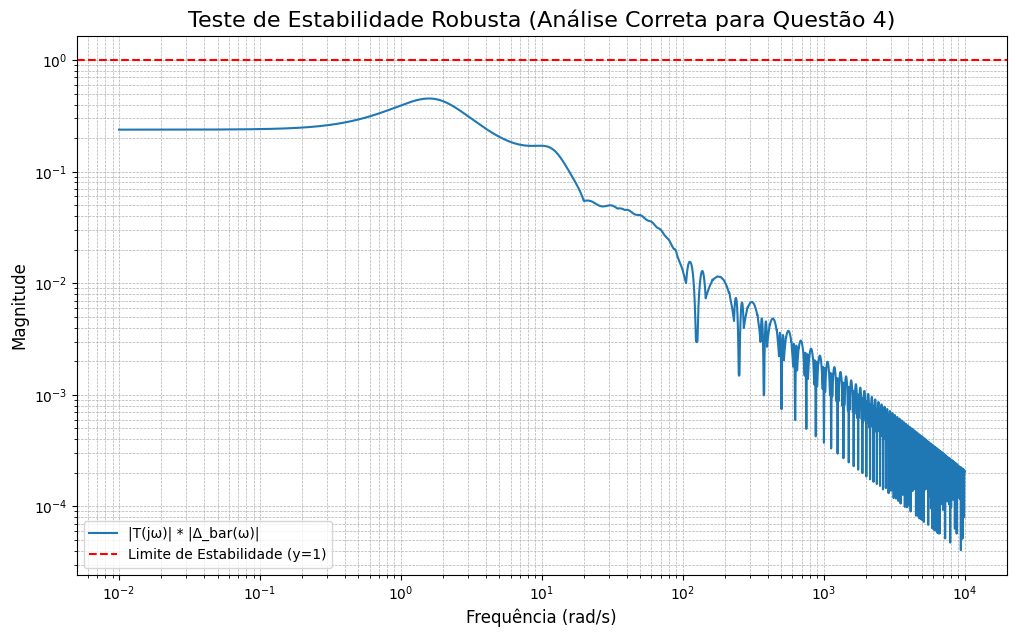

In [31]:
# --- Dados das Questões Anteriores ---

# Parâmetros dos Modelos
K1, L1, tau1 = 1.3, 0.9, 1.2
K2, L2, tau2 = 0.9, 0.7, 1.1
K3, L3, tau3 = 1.2, 0.6, 0.8
K4, L4, tau4 = 0.8, 0.4, 0.9

# Parâmetros do Modelo Nominal (Médio)
Kn = (K1 + K2 + K3 + K4) / 4
Ln = (L1 + L2 + L3 + L4) / 4
taun = (tau1 + tau2 + tau3 + tau4) / 4

# Parâmetros do Controlador PI (Skogestad)
tau_c = 0.5
Kc = taun / (Kn * (tau_c + Ln))
Ti = np.min([taun, 4 * (tau_c + Ln)])

# Vetor de frequência e 's'
w = np.logspace(-2, 4, 10000)
s = 1j * w

# --- Passo 1: Calcular o Limitante da Incerteza (Δ_bar) ---

# Respostas em frequência (já calculadas na Q1)
Gn_jw = Kn * np.exp(-s * Ln) / (taun * s + 1)
G1_jw = K1 * np.exp(-s * L1) / (tau1 * s + 1)
G2_jw = K2 * np.exp(-s * L2) / (tau2 * s + 1)
G3_jw = K3 * np.exp(-s * L3) / (tau3 * s + 1)
G4_jw = K4 * np.exp(-s * L4) / (tau4 * s + 1)

# Incertezas individuais
Delta1 = np.abs(1 - G1_jw / Gn_jw)
Delta2 = np.abs(1 - G2_jw / Gn_jw)
Delta3 = np.abs(1 - G3_jw / Gn_jw)
Delta4 = np.abs(1 - G4_jw / Gn_jw)

# Δ_bar é o máximo das incertezas em cada frequência
Delta_bar = np.maximum.reduce([Delta1, Delta2, Delta3, Delta4])

# --- Passo 2: Calcular a Resposta em Frequência do Controlador C(jω) ---
C_jw = Kc * (s * Ti + 1) / (s * Ti)
C_mag = np.abs(C_jw)

# --- Passo 3: Gerar o Gráfico para a Questão 3 ---
product_q3 = C_mag * Delta_bar

plt.figure(figsize=(12, 7))
plt.semilogx(w, product_q3)
plt.title('Gráfico da Questão 3: |C(jω)| * |Δ_bar(ω)|', fontsize=16)
plt.xlabel('Frequência (rad/s)', fontsize=12)
plt.ylabel('Magnitude', fontsize=12)
plt.grid(True, which="both", linestyle='--', linewidth=0.5)
plt.show()

# --- Passo 4 e 5: Realizar a Análise Correta para a Questão 4 ---

# Calcular a função de malha L(s) = C(s)Gn(s)
L_jw = C_jw * Gn_jw

# Calcular a função de sensibilidade complementar T(s) = L(s)/(1+L(s))
T_jw = L_jw / (1 + L_jw)
T_mag = np.abs(T_jw)

# Calcular o produto para o teste de robustez
robustness_test = T_mag * Delta_bar

# Gerar o gráfico do teste de robustez
plt.figure(figsize=(12, 7))
plt.loglog(w, robustness_test, label='|T(jω)| * |Δ_bar(ω)|')
# Adicionar uma linha em y=1 como referência para a condição
plt.axhline(y=1, color='r', linestyle='--', label='Limite de Estabilidade (y=1)')
plt.title('Teste de Estabilidade Robusta (Análise Correta para Questão 4)', fontsize=16)
plt.xlabel('Frequência (rad/s)', fontsize=12)
plt.ylabel('Magnitude', fontsize=12)
plt.grid(True, which="both", linestyle='--', linewidth=0.5)
plt.legend()
plt.show()



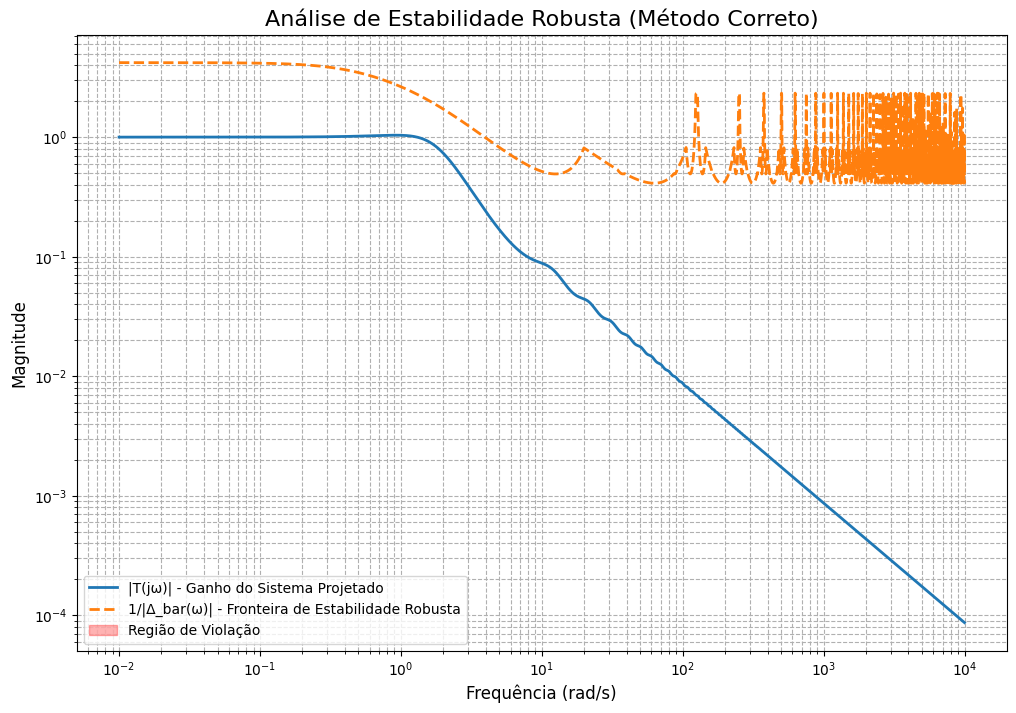

In [32]:
# --- Dados das Questões Anteriores ---

# Parâmetros dos Modelos
K1, L1, tau1 = 1.3, 0.9, 1.2
K2, L2, tau2 = 0.9, 0.7, 1.1
K3, L3, tau3 = 1.2, 0.6, 0.8
K4, L4, tau4 = 0.8, 0.4, 0.9

# Parâmetros do Modelo Nominal (Médio)
Kn = (K1 + K2 + K3 + K4) / 4
Ln = (L1 + L2 + L3 + L4) / 4
taun = (tau1 + tau2 + tau3 + tau4) / 4

# Parâmetros do Controlador PI (Skogestad)
tau_c = 0.5
Kc = taun / (Kn * (tau_c + Ln))
Ti = np.min([taun, 4 * (tau_c + Ln)])

# Vetor de frequência e 's'
w = np.logspace(-2, 4, 10000)
s = 1j * w

# --- Análise para a Questão 4 ---

# Calcular o limitante da incerteza (Δ_bar)
Gn_jw = Kn * np.exp(-s * Ln) / (taun * s + 1)
G1_jw = K1 * np.exp(-s * L1) / (tau1 * s + 1)
G2_jw = K2 * np.exp(-s * L2) / (tau2 * s + 1)
G3_jw = K3 * np.exp(-s * L3) / (tau3 * s + 1)
G4_jw = K4 * np.exp(-s * L4) / (tau4 * s + 1)
Delta1 = np.abs(1 - G1_jw / Gn_jw)
Delta2 = np.abs(1 - G2_jw / Gn_jw)
Delta3 = np.abs(1 - G3_jw / Gn_jw)
Delta4 = np.abs(1 - G4_jw / Gn_jw)
Delta_bar = np.maximum.reduce([Delta1, Delta2, Delta3, Delta4])

# Calcular a função de sensibilidade complementar T(jω)
C_jw = Kc * (s * Ti + 1) / (s * Ti)
L_jw = C_jw * Gn_jw
T_jw = L_jw / (1 + L_jw)
T_mag = np.abs(T_jw)

# Calcular o limite de robustez 1/|Δ_bar(ω)|
# Adicionamos um valor muito pequeno para evitar divisão por zero, caso Δ_bar seja zero
robustness_boundary = 1 / (Delta_bar + 1e-9)

# --- Geração do Gráfico de Análise de Robustez (Método Correto) ---

plt.figure(figsize=(12, 8))
# Plotar o ganho do sistema em malha fechada
plt.loglog(w, T_mag, label='|T(jω)| - Ganho do Sistema Projetado', linewidth=2)
# Plotar a fronteira de estabilidade
plt.loglog(w, robustness_boundary, label='1/|Δ_bar(ω)| - Fronteira de Estabilidade Robusta', linestyle='--', linewidth=2)

plt.title('Análise de Estabilidade Robusta (Método Correto)', fontsize=16)
plt.xlabel('Frequência (rad/s)', fontsize=12)
plt.ylabel('Magnitude', fontsize=12)
plt.grid(True, which="both", linestyle='--')
plt.legend(fontsize=11)
plt.fill_between(w, T_mag, robustness_boundary, where=T_mag > robustness_boundary, color='red', alpha=0.3, label='Região de Violação')
plt.legend() # Chamar de novo para incluir o label do fill_between
plt.show()



## Resolução Questão 5

--- Resolução da Questão 5 com Parâmetros Corretos ---

Modelo Nominal Médio: Kn=1.0000, Ln=0.7000, taun=0.9750

Parâmetros do Controlador (Skogestad): Kc=0.8125, Ti=0.9750

--- Simulando para o Modelo M1 ---
--- Simulando para o Modelo M2 ---
--- Simulando para o Modelo M3 ---
--- Simulando para o Modelo M4 ---


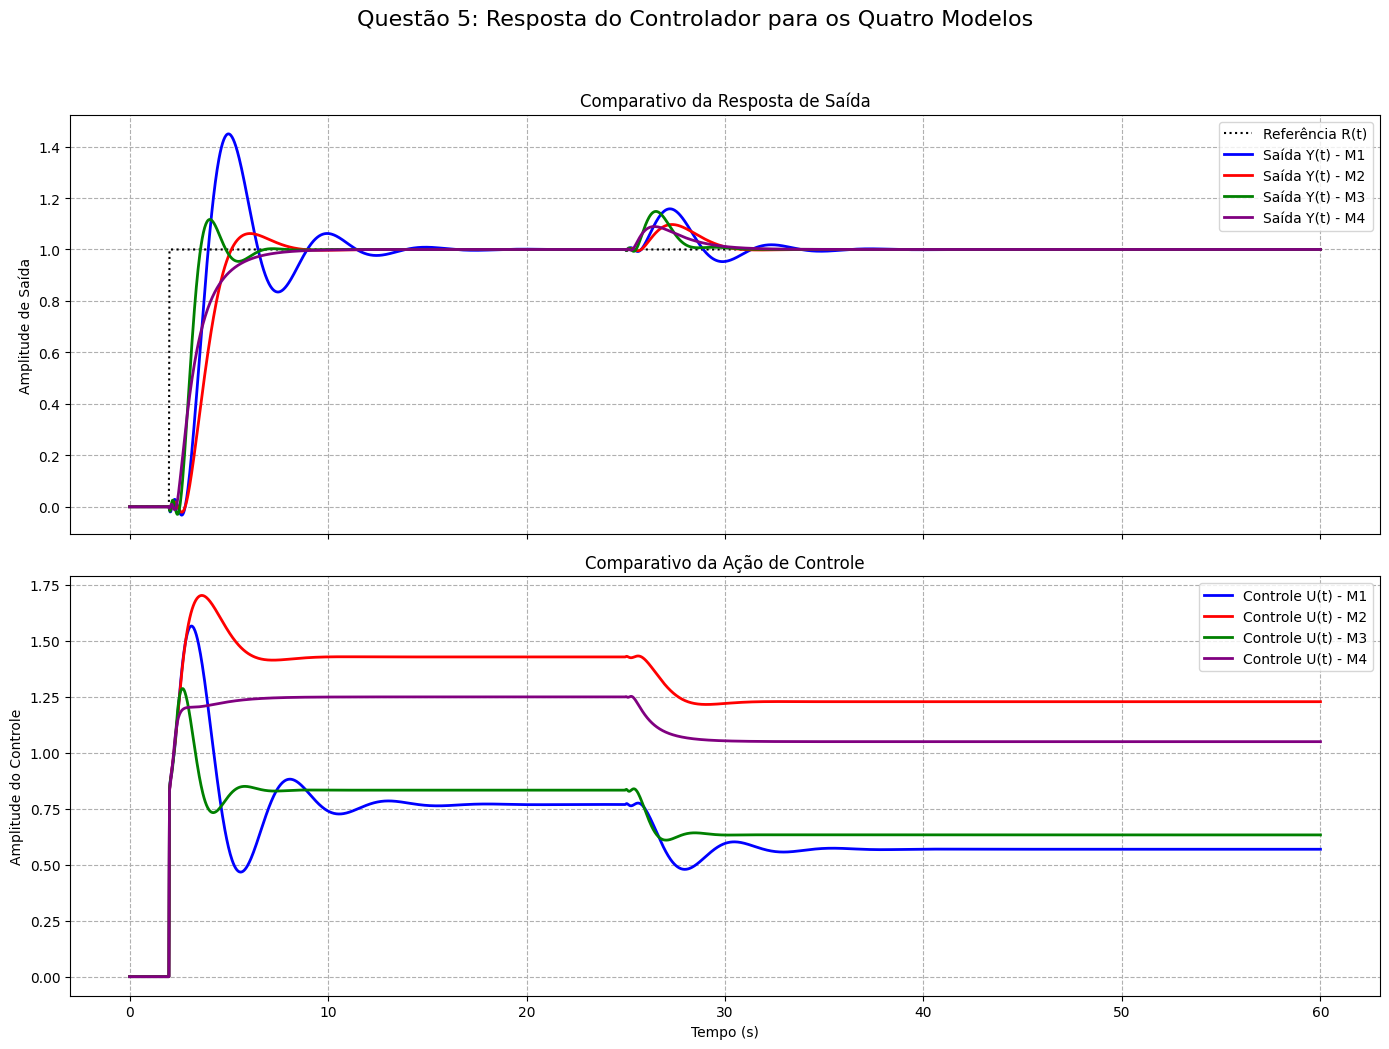

In [33]:
# Aqui começou a ficar complicado, vou ter adaptar algumas coisas que vão ficar muito diferentes do MATLAB e OCTAVE

# ====================================================================
# PASSO 1: CÁLCULO DO CONTROLADOR E DEFINIÇÃO DOS MODELOS
# ====================================================================

print("--- Resolução da Questão 5 com Parâmetros Corretos ---\n")

# --- 1.1. Parâmetros dos 4 Modelos (extraídos do enunciado) ---
params = {
    'M1': {'K': 1.3, 'L': 0.9, 'tau': 1.2, 'cor': 'blue'},
    'M2': {'K': 0.7, 'L': 0.9, 'tau': 1.0, 'cor': 'red'},
    'M3': {'K': 1.2, 'L': 0.6, 'tau': 0.8, 'cor': 'green'},
    'M4': {'K': 0.8, 'L': 0.4, 'tau': 0.9, 'cor': 'purple'}
}

# --- 1.2. Cálculo do Modelo Nominal (Médio) ---
Kn = np.mean([p['K'] for p in params.values()])
Ln = np.mean([p['L'] for p in params.values()])
taun = np.mean([p['tau'] for p in params.values()])
print(f"Modelo Nominal Médio: Kn={Kn:.4f}, Ln={Ln:.4f}, taun={taun:.4f}\n")

# --- 1.3. Cálculo do Controlador PI (Sintonia de Skogestad) ---
tc = 0.5
Kc = taun / (Kn * (tc + Ln))
Ti = min(taun, 4 * (tc + Ln))
print(f"Parâmetros do Controlador (Skogestad): Kc={Kc:.4f}, Ti={Ti:.4f}\n")
C = ct.TransferFunction([Kc * Ti, Kc], [Ti, 0])

# --- 1.4. Definição dos Sinais de Entrada ---
t = np.linspace(0, 60, 2000)
r_t = np.ones_like(t); r_t[t < 2] = 0
qu_t = 0.2 * np.ones_like(t); qu_t[t < 25] = 0
qy_t = np.zeros_like(t)

# Dicionários para armazenar os resultados
resultados_y = {}
resultados_u = {}

# ====================================================================
# PASSO 2: SIMULAÇÃO PARA CADA MODELO
# ====================================================================

for nome_modelo, p in params.items():

    print(f"--- Simulando para o Modelo {nome_modelo} ---")

    # Criação da Planta G(s) com Aproximação de Padé de Nª ORDEM - ÚNICA SOLUÇÃO POSSÍVEL
    G_rational = ct.TransferFunction([p['K']], [p['tau'], 1])
    num_pade, den_pade = ct.pade(p['L'], n=3) # CONTROLA A ORDEM DO PADÉ QUE EU ESTIVER APROXIMANDO O ATRASO
    tf_pade = ct.TransferFunction(num_pade, den_pade)
    G_simulacao = G_rational * tf_pade

    # Funções de Transferência da Malha Fechada (1-DOF)
    S_tf = ct.feedback(1, G_simulacao * C)
    T_tf = ct.feedback(G_simulacao * C, 1)

    Y_from_R_tf = T_tf
    Y_from_Qu_tf = G_simulacao * S_tf
    U_from_R_tf = C * S_tf
    U_from_Qu_tf = -T_tf

    # Simulação e soma dos efeitos
    _, y_r = ct.forced_response(Y_from_R_tf, t, r_t)
    _, y_qu = ct.forced_response(Y_from_Qu_tf, t, qu_t)
    resultados_y[nome_modelo] = y_r + y_qu

    _, u_r = ct.forced_response(U_from_R_tf, t, r_t)
    _, u_qu = ct.forced_response(U_from_Qu_tf, t, qu_t)
    resultados_u[nome_modelo] = u_r + u_qu

# ====================================================================
# PASSO 3: GERAÇÃO DOS GRÁFICOS COMPARATIVOS
# ====================================================================

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 11), sharex=True)
fig.suptitle('Questão 5: Resposta do Controlador para os Quatro Modelos', fontsize=16)

# --- Gráfico da Saída Y(t) ---
ax1.plot(t, r_t, 'k:', label='Referência R(t)')
for nome_modelo, y_total in resultados_y.items():
    ax1.plot(t, y_total, label=f'Saída Y(t) - {nome_modelo}', color=params[nome_modelo]['cor'], linewidth=2)
ax1.set_ylabel('Amplitude de Saída')
ax1.set_title('Comparativo da Resposta de Saída')
ax1.grid(True, which="both", linestyle='--')
ax1.legend()

# --- Gráfico da Ação de Controle U(t) ---
for nome_modelo, u_total in resultados_u.items():
    ax2.plot(t, u_total, label=f'Controle U(t) - {nome_modelo}', color=params[nome_modelo]['cor'], linewidth=2)
ax2.set_ylabel('Amplitude do Controle')
ax2.set_xlabel('Tempo (s)')
ax2.set_title('Comparativo da Ação de Controle')
ax2.grid(True, which="both", linestyle='--')
ax2.legend()

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


## Resolução Questão 6

--- Simulação para a Questão 6: Modelo M1 ---

1. Planta do Modelo M1 (G1(s))
<TransferFunction>: sys[479]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']

       -1.3 s^3 + 17.33 s^2 - 96.3 s + 214
  ----------------------------------------------
  1.2 s^4 + 17 s^3 + 102.2 s^2 + 271.6 s + 164.6

2. Função de Transferência do Controlador (C(s))
<TransferFunction>: sys[480]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']

  0.8282 s + 0.8282
  -----------------
          s

3. Função de Transferência do Filtro (F(s))
<TransferFunction>: sys[481]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']

    1
  -----
  s + 1


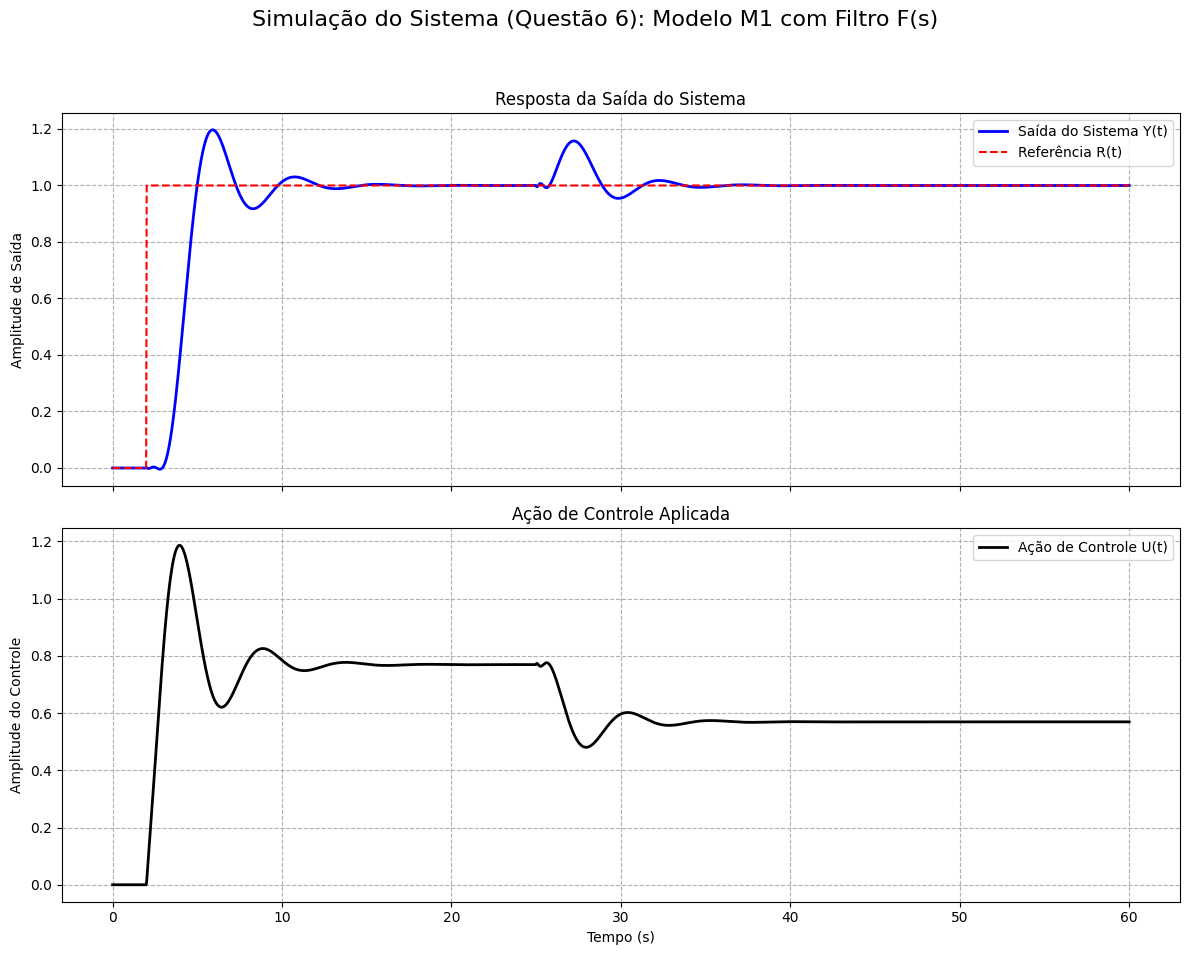

In [34]:
# ====================================================================
# PASSO 1: DEFINIÇÃO DE PARÂMETROS E MODELAGEM DOS SISTEMAS
# ====================================================================

print("--- Simulação para a Questão 6: Modelo M1 ---\n")

# --- Parâmetros do Modelo M1 e do Controlador ---
p1 = {'K': 1.3, 'L': 0.9, 'tau': 1.2}
Kc = 0.8282
Ti = 1.0

# --- Planta G1(s) ---
print("1. Planta do Modelo M1 (G1(s))")
# Modelagem da planta usando Aproximação de Padé de 3ª ordem para o atraso
G1_rational = ct.TransferFunction([p1['K']], [p1['tau'], 1])
num_pade, den_pade = ct.pade(p1['L'], n=3)
tf_pade = ct.TransferFunction(num_pade, den_pade)
G1_simulacao = G1_rational * tf_pade
print(G1_simulacao)

# --- Controlador C(s) ---
C = ct.TransferFunction([Kc * Ti, Kc], [Ti, 0])
print("\n2. Função de Transferência do Controlador (C(s))")
print(C)

# --- Filtro F(s) ---
F = ct.TransferFunction([1], [Ti, 1])
print("\n3. Função de Transferência do Filtro (F(s))")
print(F)

# ====================================================================
# PASSO 2: SIMULAÇÃO DA MALHA FECHADA (ARQUITETURA 2-DOF)
# ====================================================================

# --- Vetor de tempo e sinais de entrada no domínio do tempo ---
t = np.linspace(0, 60, 2000)
r_t = np.ones_like(t); r_t[t < 2] = 0
qu_t = 0.2 * np.ones_like(t); qu_t[t < 25] = 0
qy_t = np.zeros_like(t) # Conforme definição do problema

# --- Cálculo das Funções de Transferência da Malha Fechada ---
# Função Sensibilidade S(s) = 1 / (1 + G*C)
# Função Sensibilidade Complementar T(s) = G*C / (1 + G*C)
S_tf = ct.feedback(1, G1_simulacao * C)
T_tf = ct.feedback(G1_simulacao * C, 1)

# Para a Saída Y(t): Y = (T*F)*R + (G*S)*Qu + (S)*Qy
Y_from_R_tf = T_tf * F
# ***** CORREÇÃO FUNDAMENTAL APLICADA AQUI *****
Y_from_Qu_tf = G1_simulacao * S_tf
Y_from_Qy_tf = S_tf

# Para a Ação de Controle U(t): U = (C*S*F)*R - (T)*Qu - (C*S)*Qy
U_from_R_tf = C * S_tf * F
U_from_Qu_tf = -T_tf
U_from_Qy_tf = -C * S_tf

# --- Simulação das respostas utilizando `forced_response` ---
# Resposta da Saída Y(t)
_, y_r = ct.forced_response(Y_from_R_tf, t, r_t)
_, y_qu = ct.forced_response(Y_from_Qu_tf, t, qu_t)
_, y_qy = ct.forced_response(Y_from_Qy_tf, t, qy_t)
y_total = y_r + y_qu + y_qy

# Resposta da Ação de Controle U(t)
_, u_r = ct.forced_response(U_from_R_tf, t, r_t)
_, u_qu = ct.forced_response(U_from_Qu_tf, t, qu_t)
_, u_qy = ct.forced_response(U_from_Qy_tf, t, qy_t)
u_total = u_r + u_qu + u_qy

# ====================================================================
# PASSO 3: GERAÇÃO DOS GRÁFICOS PARA APRESENTAÇÃO
# ====================================================================

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10), sharex=True)
fig.suptitle('Simulação do Sistema (Questão 6): Modelo M1 com Filtro F(s)', fontsize=16)

# Gráfico da Saída Y(t)
ax1.plot(t, y_total, label='Saída do Sistema Y(t)', color='blue', linewidth=2)
ax1.plot(t, r_t, 'r--', label='Referência R(t)')
ax1.set_ylabel('Amplitude de Saída')
ax1.set_title('Resposta da Saída do Sistema')
ax1.grid(True, which="both", linestyle='--')
ax1.legend()

# Gráfico da Ação de Controle U(t)
ax2.plot(t, u_total, label='Ação de Controle U(t)', color='black', linewidth=2)
ax2.set_ylabel('Amplitude do Controle')
ax2.set_xlabel('Tempo (s)')
ax2.set_title('Ação de Controle Aplicada')
ax2.grid(True, which="both", linestyle='--')
ax2.legend()

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


## Simulação Questão 7

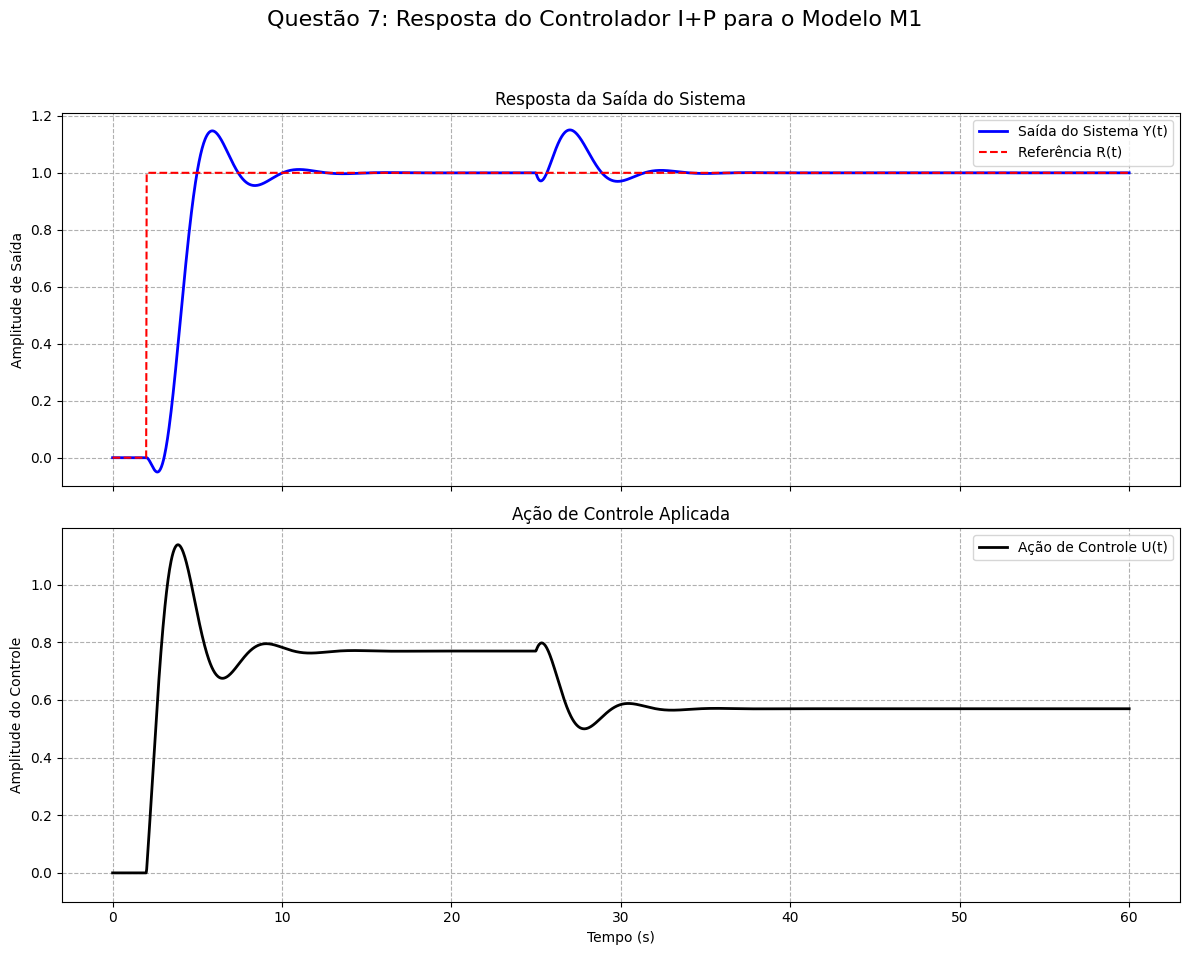

In [35]:
# ====================================================================
# PASSO 1: DEFINIÇÃO DE PARÂMETROS E MODELOS
# ====================================================================

# --- 1.1. Parâmetros do Modelo M1 ---
p1 = {'K': 1.3, 'L': 0.9, 'tau': 1.2}

# --- 1.2. Cálculo do Controlador PI (Sintonia de Skogestad) ---
# Usando o modelo nominal (médio) calculado anteriormente para consistência.
Kn, Ln, taun = 1.0, 0.7, 0.975
tc = 0.5
Kc = taun / (Kn * (tc + Ln))
Ti = min(taun, 4 * (tc + Ln))

# Criação do controlador PI padrão C(s) e do termo Integral I(s)
C = ct.TransferFunction([Kc * Ti, Kc], [Ti, 0])
I_term = ct.TransferFunction([Kc], [Ti, 0])

# --- 1.3. Criação da Planta G(s) com Aproximação de Padé (n=1) ---
G_rational = ct.TransferFunction([p1['K']], [p1['tau'], 1])
num_pade, den_pade = ct.pade(p1['L'], n=1)
tf_pade = ct.TransferFunction(num_pade, den_pade)
G_simulacao = G_rational * tf_pade

# --- 1.4. Definição dos Sinais de Entrada ---
t = np.linspace(0, 60, 2000)
r_t = np.ones_like(t); r_t[t < 2] = 0
qu_t = 0.2 * np.ones_like(t); qu_t[t < 25] = 0
qy_t = np.zeros_like(t)

# ====================================================================
# PASSO 2: SIMULAÇÃO DA ARQUITETURA I+P
# ====================================================================

# --- 2.1. Funções de Transferência da Malha Fechada (I+P) ---
S_tf = ct.feedback(1, G_simulacao * C)
T_tf = ct.feedback(G_simulacao * C, 1)

# Para a Saída Y(s):
# Y/R = (G*I)/(1+G*C) = T*F (idêntico à Questão 6)
# Y/Qu = G*S
Y_from_R_tf = T_tf * ct.TransferFunction([1], [Ti, 1])
Y_from_Qu_tf = G_simulacao * S_tf

# Para a Ação de Controle U(s):
# U/R = I*S
# U/Qu = -T
U_from_R_tf = I_term * S_tf
U_from_Qu_tf = -T_tf

# --- 2.2. Simulação da resposta temporal por superposição ---
_, y_r = ct.forced_response(Y_from_R_tf, t, r_t)
_, y_qu = ct.forced_response(Y_from_Qu_tf, t, qu_t)
y_total = y_r + y_qu

_, u_r = ct.forced_response(U_from_R_tf, t, r_t)
_, u_qu = ct.forced_response(U_from_Qu_tf, t, qu_t)
u_total = u_r + u_qu

# ====================================================================
# PASSO 3: GERAÇÃO DOS GRÁFICOS PARA APRESENTAÇÃO
# ====================================================================

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10), sharex=True)
fig.suptitle('Questão 7: Resposta do Controlador I+P para o Modelo M1', fontsize=16)

# --- Subplot da Saída Y(t) ---
ax1.plot(t, y_total, label='Saída do Sistema Y(t)', color='blue', linewidth=2)
ax1.plot(t, r_t, 'r--', label='Referência R(t)')
ax1.set_ylabel('Amplitude de Saída')
ax1.set_title('Resposta da Saída do Sistema')
ax1.grid(True, which="both", linestyle='--')
ax1.legend()
ax1.set_ylim(bottom=-0.1) # Garante que o eixo Y comece abaixo de zero

# --- Subplot da Ação de Controle U(t) ---
ax2.plot(t, u_total, label='Ação de Controle U(t)', color='black', linewidth=2)
ax2.set_ylabel('Amplitude do Controle')
ax2.set_xlabel('Tempo (s)')
ax2.set_title('Ação de Controle Aplicada')
ax2.grid(True, which="both", linestyle='--')
ax2.legend()
ax2.set_ylim(bottom=-0.1) # Garante que o eixo Y comece abaixo de zero

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()



## Simulação Questão 8

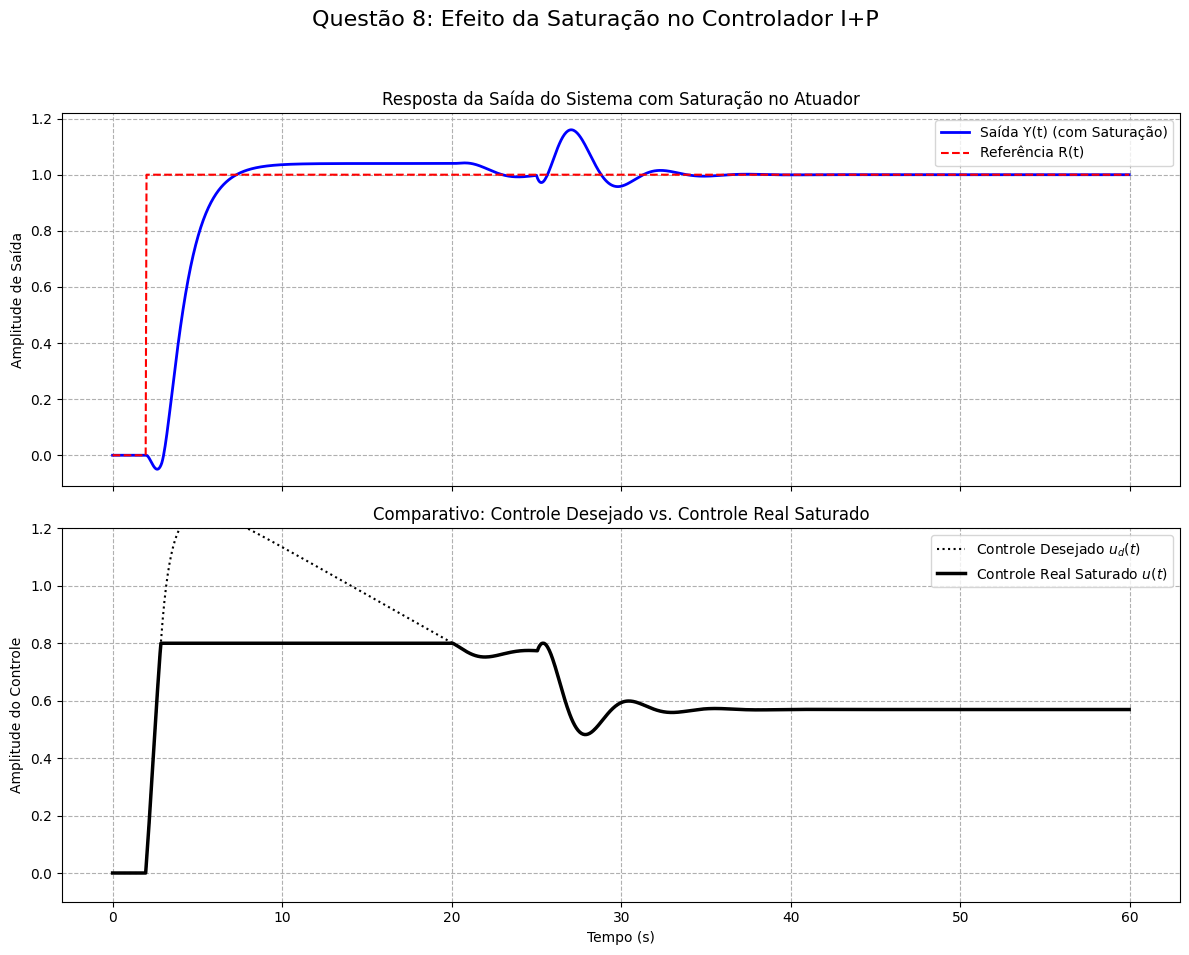

In [36]:
# ====================================================================
# PASSO 1: DEFINIÇÃO DOS PARÂMETROS E MODELOS
# ====================================================================

# --- 1.1. Parâmetros do Modelo M1 ---
p1 = {'K': 1.3, 'L': 0.9, 'tau': 1.2}

# --- 1.2. Parâmetros do Controlador (Sintonia de Skogestad) ---
Kn, Ln, taun = 1.0, 0.7, 0.975
tc = 0.5
Kc = taun / (Kn * (tc + Ln))
Ti = min(taun, 4 * (tc + Ln))

# --- 1.3. Criação da Planta G(s) com Aproximação de Padé (n=1) ---
G_rational = ct.TransferFunction([p1['K']], [p1['tau'], 1])
num_pade, den_pade = ct.pade(p1['L'], n=1)
tf_pade = ct.TransferFunction(num_pade, den_pade)
G_simulacao = G_rational * tf_pade

# Discretiza a planta para a simulação passo a passo
dt = 0.05  # Passo de tempo da simulação
G_discrete = ct.c2d(G_simulacao, dt, method='zoh')
num_d, den_d = G_discrete.num[0][0], G_discrete.den[0][0]

# --- 1.4. Definição dos Sinais de Entrada e Vetores de Simulação ---
t = np.arange(0, 60, dt)
r_t = np.ones_like(t); r_t[t < 2] = 0
qu_t = 0.2 * np.ones_like(t); qu_t[t < 25] = 0

# Vetores para armazenar os resultados
y_t = np.zeros_like(t)      # Saída real da planta
ud_t = np.zeros_like(t)     # Controle desejado (sem saturação)
u_t = np.zeros_like(t)      # Controle real (com saturação)
plant_input_history = np.zeros_like(t) # u(t) + qu(t)

# Estado do controlador
integrator_state = 0.0

# ====================================================================
# PASSO 2: SIMULAÇÃO NÃO-LINEAR PASSO A PASSO
# ====================================================================

# Loop principal da simulação
for k in range(2, len(t)): # Começa do 2 para ter histórico para a planta

    # 2.1. Calcula o erro
    e_k = r_t[k] - y_t[k-1]

    # 2.2. Atualiza o estado do integrador do controlador
    integrator_state += (Kc / Ti) * e_k * dt

    # 2.3. Calcula o controle desejado (ud) pela lei I+P
    ud_t[k] = integrator_state - Kc * y_t[k-1]

    # 2.4. Aplica a saturação para obter o controle real (u)
    if ud_t[k] >= 0.8:
        u_t[k] = 0.8
    elif ud_t[k] <= 0:
        u_t[k] = 0.0
    else:
        u_t[k] = ud_t[k]

    # 2.5. Calcula a entrada total para a planta
    plant_input_history[k] = u_t[k] + qu_t[k]

    # 2.6. Calcula a nova saída da planta usando a equação de diferenças
    # y(k) = -den[1]*y(k-1) - den[2]*y(k-2) + num[0]*u(k) + num[1]*u(k-1) ...
    # Assumindo que a planta discretizada é de 2ª ordem (FOPDT + Padé n=1)
    y_t[k] = -den_d[1]*y_t[k-1] - den_d[2]*y_t[k-2] + num_d[0]*plant_input_history[k-1] + num_d[1]*plant_input_history[k-2]

# ====================================================================
# PASSO 3: GERAÇÃO DOS GRÁFICOS PARA APRESENTAÇÃO
# ====================================================================

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10), sharex=True)
fig.suptitle('Questão 8: Efeito da Saturação no Controlador I+P', fontsize=16)

# --- Subplot da Saída Y(t) ---
ax1.plot(t, y_t, label='Saída Y(t) (com Saturação)', color='blue', linewidth=2)
ax1.plot(t, r_t, 'r--', label='Referência R(t)')
ax1.set_ylabel('Amplitude de Saída')
ax1.set_title('Resposta da Saída do Sistema com Saturação no Atuador')
ax1.grid(True, which="both", linestyle='--')
ax1.legend()

# --- Subplot da Ação de Controle U(t) ---
ax2.plot(t, ud_t, 'k:', label='Controle Desejado $u_d(t)$', linewidth=1.5)
ax2.plot(t, u_t, label='Controle Real Saturado $u(t)$', color='black', linewidth=2.5)
ax2.set_ylabel('Amplitude do Controle')
ax2.set_xlabel('Tempo (s)')
ax2.set_title('Comparativo: Controle Desejado vs. Controle Real Saturado')
ax2.grid(True, which="both", linestyle='--')
ax2.legend()
ax2.set_ylim(-0.1, 1.2) # Ajuste de eixos para melhor visualização

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()



## Questão 9

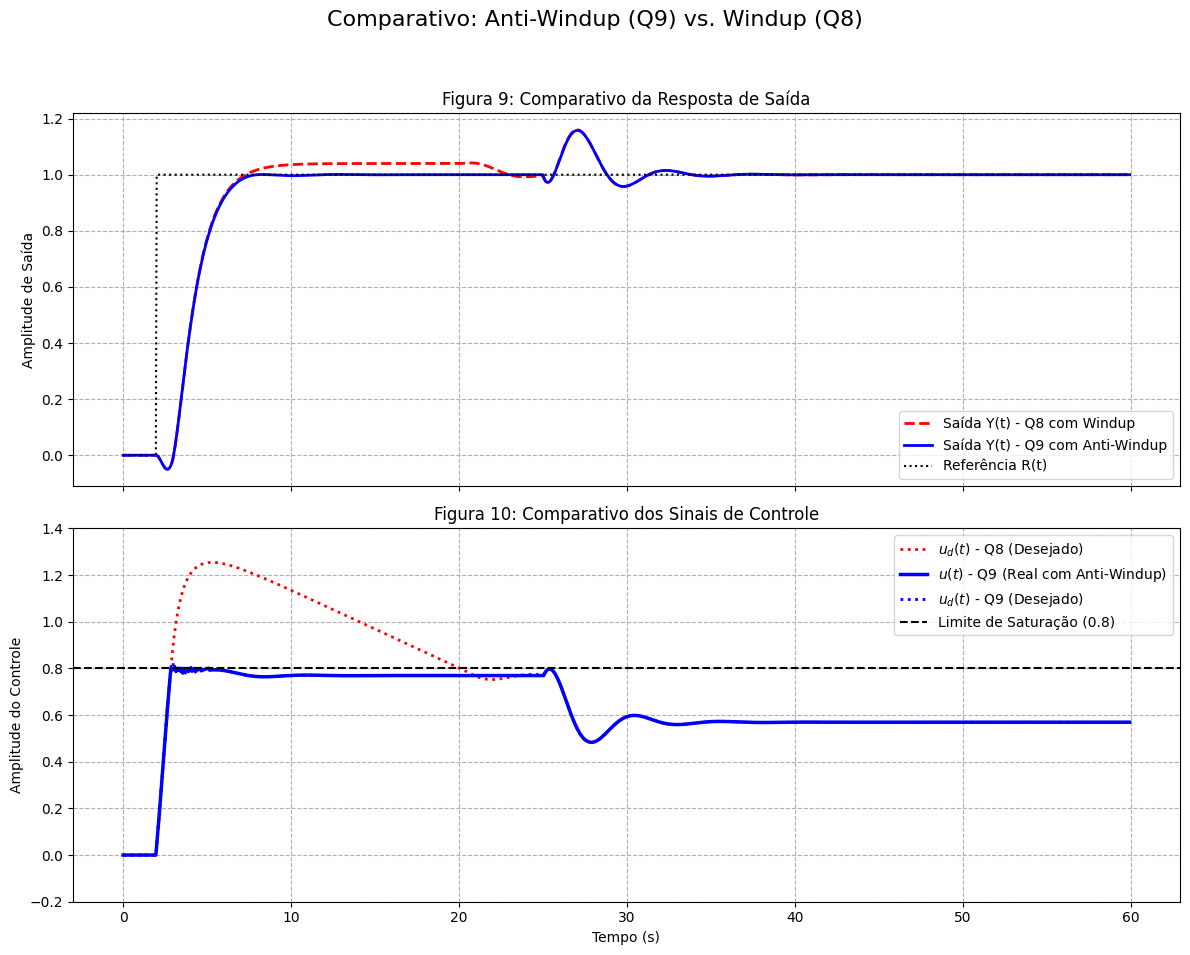

In [37]:
# ====================================================================
# PASSO 1: DEFINIÇÃO DOS PARÂMETROS E MODELOS (COMUM A AMBOS)
# ====================================================================

p1 = {'K': 1.3, 'L': 0.9, 'tau': 1.2}
Kn, Ln, taun = 1.0, 0.7, 0.975
tc = 0.5
Kc = taun / (Kn * (tc + Ln))
Ti = min(taun, 4 * (tc + Ln))

G_rational = ct.TransferFunction([p1['K']], [p1['tau'], 1])
num_pade, den_pade = ct.pade(p1['L'], n=1)
tf_pade = ct.TransferFunction(num_pade, den_pade)
G_simulacao = G_rational * tf_pade

dt = 0.05
G_discrete = ct.c2d(G_simulacao, dt, method='zoh')
num_d, den_d = G_discrete.num[0][0], G_discrete.den[0][0]

t = np.arange(0, 60, dt)
r_t = np.ones_like(t); r_t[t < 2] = 0
qu_t = 0.2 * np.ones_like(t); qu_t[t < 25] = 0

# --- Vetores de simulação para o CASO COM WINDUP (Q8) ---
y_windup = np.zeros_like(t)
ud_windup = np.zeros_like(t)
u_windup = np.zeros_like(t)
integrator_state_windup = 0.0

# --- Vetores de simulação para o CASO COM ANTI-WINDUP (Q9) ---
y_antiwindup = np.zeros_like(t)
ud_antiwindup = np.zeros_like(t)
u_antiwindup = np.zeros_like(t)
integrator_state_antiwindup = 0.0

# ====================================================================
# PASSO 2: SIMULAÇÃO PARALELA (WINDUP vs. ANTI-WINDUP)
# ====================================================================

for k in range(2, len(t)):

    # --- 2.1 Lógica do Controlador COM WINDUP (Q8) ---
    e_k_windup = r_t[k] - y_windup[k-1]
    integrator_state_windup += (Kc / Ti) * e_k_windup * dt  # Integrador sempre ativo
    ud_windup[k] = integrator_state_windup - Kc * y_windup[k-1]

    # Aplica saturação
    if ud_windup[k] >= 0.8: u_windup[k] = 0.8
    elif ud_windup[k] <= 0: u_windup[k] = 0.0
    else: u_windup[k] = ud_windup[k]

    # Simula a planta
    plant_input = u_windup[k] + qu_t[k]
    y_windup[k] = -den_d[1]*y_windup[k-1] - den_d[2]*y_windup[k-2] + num_d[0]*(u_windup[k-1]+qu_t[k-1]) + num_d[1]*(u_windup[k-2]+qu_t[k-2])

    # --- 2.2 Lógica do Controlador COM ANTI-WINDUP (Q9) ---
    e_k_antiwindup = r_t[k] - y_antiwindup[k-1]

    # Integração Condicional
    is_saturated = abs(ud_antiwindup[k-1] - u_antiwindup[k-1]) > 1e-5
    if not is_saturated:
        integrator_state_antiwindup += (Kc / Ti) * e_k_antiwindup * dt

    ud_antiwindup[k] = integrator_state_antiwindup - Kc * y_antiwindup[k-1]

    # Aplica saturação
    if ud_antiwindup[k] >= 0.8: u_antiwindup[k] = 0.8
    elif ud_antiwindup[k] <= 0: u_antiwindup[k] = 0.0
    else: u_antiwindup[k] = ud_antiwindup[k]

    # Simula a planta
    plant_input = u_antiwindup[k] + qu_t[k]
    y_antiwindup[k] = -den_d[1]*y_antiwindup[k-1] - den_d[2]*y_antiwindup[k-2] + num_d[0]*(u_antiwindup[k-1]+qu_t[k-1]) + num_d[1]*(u_antiwindup[k-2]+qu_t[k-2])

# ====================================================================
# PASSO 3: GERAÇÃO DOS GRÁFICOS COMPARATIVOS
# ====================================================================

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10), sharex=True)
fig.suptitle('Comparativo: Anti-Windup (Q9) vs. Windup (Q8)', fontsize=16)

# --- Subplot da Saída Y(t) ---
ax1.plot(t, y_windup, 'r--', label='Saída Y(t) - Q8 com Windup', linewidth=2)
ax1.plot(t, y_antiwindup, 'b-', label='Saída Y(t) - Q9 com Anti-Windup', linewidth=2)
ax1.plot(t, r_t, 'k:', label='Referência R(t)')
ax1.set_ylabel('Amplitude de Saída')
ax1.set_title('Figura 9: Comparativo da Resposta de Saída')
ax1.grid(True, which="both", linestyle='--')
ax1.legend()

# --- Subplot da Ação de Controle U(t) ---
ax2.plot(t, ud_windup, 'r:', label='$u_d(t)$ - Q8 (Desejado)', linewidth=2)
ax2.plot(t, u_antiwindup, 'b-', label='$u(t)$ - Q9 (Real com Anti-Windup)', linewidth=2.5)
ax2.plot(t, ud_antiwindup, 'b:', label='$u_d(t)$ - Q9 (Desejado)', linewidth=2)
ax2.axhline(0.8, color='k', linestyle='--', label='Limite de Saturação (0.8)')
ax2.set_ylabel('Amplitude do Controle')
ax2.set_xlabel('Tempo (s)')
ax2.set_title('Figura 10: Comparativo dos Sinais de Controle')
ax2.grid(True, which="both", linestyle='--')
ax2.legend()
ax2.set_ylim(-0.2, 1.4)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()
